# June Code Jam 

## Introduction

## Data Overview

In [47]:
# Import necessary libraries
import re
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

## Data Preprocessing

In [48]:
# Load the dataset and read the data correctly
data = pd.read_csv('datasets/spotify.csv')

In [49]:
# Display the first 5 rows of the dataset
display(data.head())

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [50]:
# Display the shape of 'data' DataFrame 
n_rows, n_cols = data.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 1994 rows and 15 columns


In [51]:
# Display informative summary of the 'data' DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [52]:
# Clean column names: replace spaces with underscores, remove special characters, and convert to lowercase
data.columns = [re.sub(r'\s+', '_', re.sub(r'[^\w\s]', '', col)).lower() for col in data.columns]

# Checking if the column names are renamed successfully
data.columns

Index(['index', 'title', 'artist', 'top_genre', 'year', 'beats_per_minute_bpm',
       'energy', 'danceability', 'loudness_db', 'liveness', 'valence',
       'length_duration', 'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [53]:
# Check for any duplicates in the dataframe
duplicates = data[data.duplicated()]
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 0


In [54]:
# Check for missing values in 'data' DataFrame
display(data.isna().sum())

index                   0
title                   0
artist                  0
top_genre               0
year                    0
beats_per_minute_bpm    0
energy                  0
danceability            0
loudness_db             0
liveness                0
valence                 0
length_duration         0
acousticness            0
speechiness             0
popularity              0
dtype: int64

In [55]:
# Count the occurrences of each unique value in the 'length_duration' column 
# This is done to check why is this column datatype is object
data['length_duration'].value_counts()

length_duration
215      23
243      21
241      20
217      20
236      20
         ..
1,367     1
433       1
602       1
421       1
128       1
Name: count, Length: 350, dtype: int64

In [56]:
# Count how many values in the 'length_duration' column contain a comma
num_with_comma = data['length_duration'].str.contains(',').sum()
print(f"Number of values with a comma: {num_with_comma}")

Number of values with a comma: 4


In [57]:
# Strip commas from length_duration entries that have them
data['length_duration'] = data['length_duration'].str.replace(',', '')

In [58]:
# Convert 'length_duration' column to integer data type
data['length_duration'] = data['length_duration'].astype(int)

# Checking if the datatype of 'length_duration' column is successfully changed
data['length_duration'].dtype

dtype('int32')

In [59]:
# Display descriptive statistics of the 'data' DataFrame
data.describe()

,index,year,beats_per_minute_bpm,energy,danceability,loudness_db,liveness,valence,length_duration,acousticness,speechiness,popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


## The `top_genre` Feature

`top_genre` is a feature in our data that describes the genre of the corresponding song. Sounds simple enough, right? Well, if we want the users of our app to be able to look at data for different genres, we need to ensure that we're not breaking our data down into options that have relatively few data points. There are...

In [60]:
data['top_genre'].value_counts().count()

149

...149 different genres represented by our data. The median genre has barely any songs in it at all:

In [61]:
data['top_genre'].value_counts().sort_values(ascending=False).median()


3.0

Three songs is hardly enough to call "data." So we need a solution that can both reduce the number of categories our users have to menu through and ensure that obscure genres are still able to be represented.

Enter `genre_group`:

In [62]:
data['genre_group'] = data['top_genre'].copy()

In [63]:
data['genre_group'].value_counts()

genre_group
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: count, Length: 149, dtype: int64

We'll leave `top_genre` untouched, but do some operations on this new copy of it to reduce the fragmentation of the data when it's sorted or grouped by genre.

We can examine whether a few particular phrases appear in many genres:

In [64]:
data[data['top_genre'].str.contains('rock')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 1 to 1991
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 857 non-null    int64 
 1   title                 857 non-null    object
 2   artist                857 non-null    object
 3   top_genre             857 non-null    object
 4   year                  857 non-null    int64 
 5   beats_per_minute_bpm  857 non-null    int64 
 6   energy                857 non-null    int64 
 7   danceability          857 non-null    int64 
 8   loudness_db           857 non-null    int64 
 9   liveness              857 non-null    int64 
 10  valence               857 non-null    int64 
 11  length_duration       857 non-null    int32 
 12  acousticness          857 non-null    int64 
 13  speechiness           857 non-null    int64 
 14  popularity            857 non-null    int64 
 15  genre_group           857 non-null    object

In [65]:
data[data['top_genre'].str.contains('pop')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 5 to 1971
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 398 non-null    int64 
 1   title                 398 non-null    object
 2   artist                398 non-null    object
 3   top_genre             398 non-null    object
 4   year                  398 non-null    int64 
 5   beats_per_minute_bpm  398 non-null    int64 
 6   energy                398 non-null    int64 
 7   danceability          398 non-null    int64 
 8   loudness_db           398 non-null    int64 
 9   liveness              398 non-null    int64 
 10  valence               398 non-null    int64 
 11  length_duration       398 non-null    int32 
 12  acousticness          398 non-null    int64 
 13  speechiness           398 non-null    int64 
 14  popularity            398 non-null    int64 
 15  genre_group           398 non-null    object

857 of our 1994 songs contain some sort of "rock" in the genre, while 398 contain "pop." Presumably a few are "pop rock":

In [66]:
data[data['top_genre'].str.contains('pop rock')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 5 to 1777
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 10 non-null     int64 
 1   title                 10 non-null     object
 2   artist                10 non-null     object
 3   top_genre             10 non-null     object
 4   year                  10 non-null     int64 
 5   beats_per_minute_bpm  10 non-null     int64 
 6   energy                10 non-null     int64 
 7   danceability          10 non-null     int64 
 8   loudness_db           10 non-null     int64 
 9   liveness              10 non-null     int64 
 10  valence               10 non-null     int64 
 11  length_duration       10 non-null     int32 
 12  acousticness          10 non-null     int64 
 13  speechiness           10 non-null     int64 
 14  popularity            10 non-null     int64 
 15  genre_group           10 non-null     object


So we'll have a few cases where things overlap. For our purposes, when a `top_genre` contains multiple `genre_group`s, we'll try to assign frequent ones first, which is a little arbitrary.

To get some ideas on what words to check for, let's look for word frequency:

In [67]:
top_genres = data['top_genre'].unique()

top_genres.shape

(149,)

In [68]:
top_genres_str = " ".join(top_genres)
len(top_genres_str)

1924

In [69]:
top_genres_words = top_genres_str.split(" ")
len(top_genres_words)

284

We have a list of the 284 words that appear in the `top_genre` column. To find the frequencies of those words:

In [70]:
def make_freq_dict(series):
    #convert pd.Series to concatenated string
    words = " ".join(series.unique()).split(" ")

    #create a dictionary; if word exists, increment its number, otherwise make it exist and give it a counter of 1
    dictionary = {}
    for i in words:
        if i in dictionary:
            dictionary[i] += 1
        else:
            dictionary[i] = 1
        
    return dictionary

In [71]:
top_genres_series = pd.Series(make_freq_dict(data['top_genre']))
top_genres_series.sort_values(ascending=False).head(10)

pop            33
rock           27
alternative    11
classic         8
dutch           8
australian      7
hip             6
indie           6
british         5
folk            5
dtype: int64

So we can see that there are a lot of different "pop" genres and "rock" genres, for instance. To make our genre groups, we can start with the two most obvious ones ("pop" and "rock") and then rerun the above function to see what else shakes out.

In [72]:
#leave entries that don't contain 'pop' alone; replace those that do with just 'pop'
data['genre_group'].where(~data['genre_group'].str.contains('pop'), 'pop', inplace=True)

#same, but for rock
data['genre_group'].where(~data['genre_group'].str.contains('rock'), 'rock', inplace=True)

#result
data['genre_group'].value_counts()

genre_group
rock                     847
pop                      398
adult standards          123
dutch indie               75
alternative metal         70
                        ... 
classic soundtrack         1
icelandic indie            1
compositional ambient      1
streektaal                 1
bebop                      1
Name: count, Length: 85, dtype: int64

In [73]:
#rerun the popular words check
top_genres_series = pd.Series(make_freq_dict(data['genre_group']))
top_genres_series.sort_values(ascending=False).head(10)

dutch          6
alternative    5
hip            5
hop            5
indie          5
british        4
australian     4
metal          4
folk           4
soul           4
dtype: int64

We run into an interesting situation: many of the remaining words that appear often are qualifiers, such as locations of origin or "alternative":

In [74]:
data[data['genre_group'].str.contains('alternative')]['genre_group'].value_counts()

genre_group
alternative metal      70
alternative dance      15
alternative hip hop     2
latin alternative       1
alternative country     1
Name: count, dtype: int64

In [75]:
data[data['genre_group'].str.contains('british')]['genre_group'].value_counts()

genre_group
british invasion             36
british soul                 31
british folk                  4
british singer-songwriter     1
Name: count, dtype: int64

Like any discussion involving genre, this involves a lot of interpretation and judgment. "Hip hop" and "metal" are relatively self-similar genres, but "alternative metal" and "alternative country" probably don't make sense to be grouped together. We can group the former two categories and look again:

In [76]:
data['genre_group'].where(~data['genre_group'].str.contains('hip hop'), 'hip hop', inplace=True)

data['genre_group'].where(~data['genre_group'].str.contains('metal'), 'metal', inplace=True)

#result
data['genre_group'].value_counts().head(25)

genre_group
rock                 847
pop                  398
adult standards      123
metal                 93
dutch indie           75
dutch cabaret         51
permanent wave        38
british invasion      36
british soul          31
hip hop               29
disco                 18
neo mellow            17
alternative dance     15
funk                  13
dutch americana       12
big beat              11
mellow gold           11
classic soul          11
carnaval limburg      10
chanson                9
arkansas country       9
reggae                 8
blues                  8
folk                   8
big room               7
Name: count, dtype: int64

In [77]:
top_genres_series = pd.Series(make_freq_dict(data['top_genre']))
top_genres_series.sort_values(ascending=False).iloc[2:].head(15)

alternative    11
classic         8
dutch           8
australian      7
hip             6
indie           6
british         5
folk            5
hop             5
country         4
metal           4
canadian        4
dance           4
soul            4
irish           3
dtype: int64

We have several large groups already, so we look a little farther down the list by using `iloc` to cut the first few options that we've already covered. "Folk", "country", and "soul" can likely be grouped to ensure representation:

In [78]:
data['genre_group'].where(~data['genre_group'].str.contains('folk'), 'folk', inplace=True)

data['genre_group'].where(~data['genre_group'].str.contains('country'), 'country', inplace=True)

data['genre_group'].where(~data['genre_group'].str.contains('soul'), 'soul', inplace=True)

data['genre_group'].value_counts().head(25)

genre_group
rock                 847
pop                  398
adult standards      123
metal                 93
dutch indie           75
dutch cabaret         51
soul                  45
permanent wave        38
british invasion      36
hip hop               29
folk                  21
disco                 18
neo mellow            17
alternative dance     15
funk                  13
country               12
dutch americana       12
big beat              11
mellow gold           11
carnaval limburg      10
chanson                9
blues                  8
reggae                 8
electro                7
big room               7
Name: count, dtype: int64

Our rate of change is slowing down at this point. Investigating a few other genres, even relatively broad ones like "blues," shows a lack of data:

In [79]:
data[data['genre_group'].str.contains('blues')]['genre_group'].value_counts()

genre_group
blues    8
Name: count, dtype: int64

At this point, it's worth establishing a cutoff: any `genre_group` representing 15 or fewer rows can be consolidated into "other" since there's likely not enough data to justify having them. This is an arbitrary number, and it might be changed arbitrarily later if doing so improves the Dash app.

In [80]:
cutoff = 15

#get the list of confirmed genres
(data['genre_group'].value_counts().sort_values(ascending=False) > cutoff).head(15)

genre_group
rock                  True
pop                   True
adult standards       True
metal                 True
dutch indie           True
dutch cabaret         True
soul                  True
permanent wave        True
british invasion      True
hip hop               True
folk                  True
disco                 True
neo mellow            True
alternative dance    False
funk                 False
Name: count, dtype: bool

In [81]:
#replace all False instances with "other"
#data['genre_group'].where(~data['genre_group'].str.contains('metal'), 'metal', inplace=True)
genres = data['genre_group'].value_counts()
query = ((genres > 15)[genres >15]).index

data['genre_group'].where(data['genre_group'].isin(query.values), 'other', inplace=True)
data['genre_group'].value_counts()

genre_group
rock                847
pop                 398
other               203
adult standards     123
metal                93
dutch indie          75
dutch cabaret        51
soul                 45
permanent wave       38
british invasion     36
hip hop              29
folk                 21
disco                18
neo mellow           17
Name: count, dtype: int64

So now we have a list, `genre_group`, that treats genre as a slightly broader categories than `top_genre` does. That original data is still there if we need it.

## Vislual Exploration

### Relationship Exploration

#### Correlation Heatmap

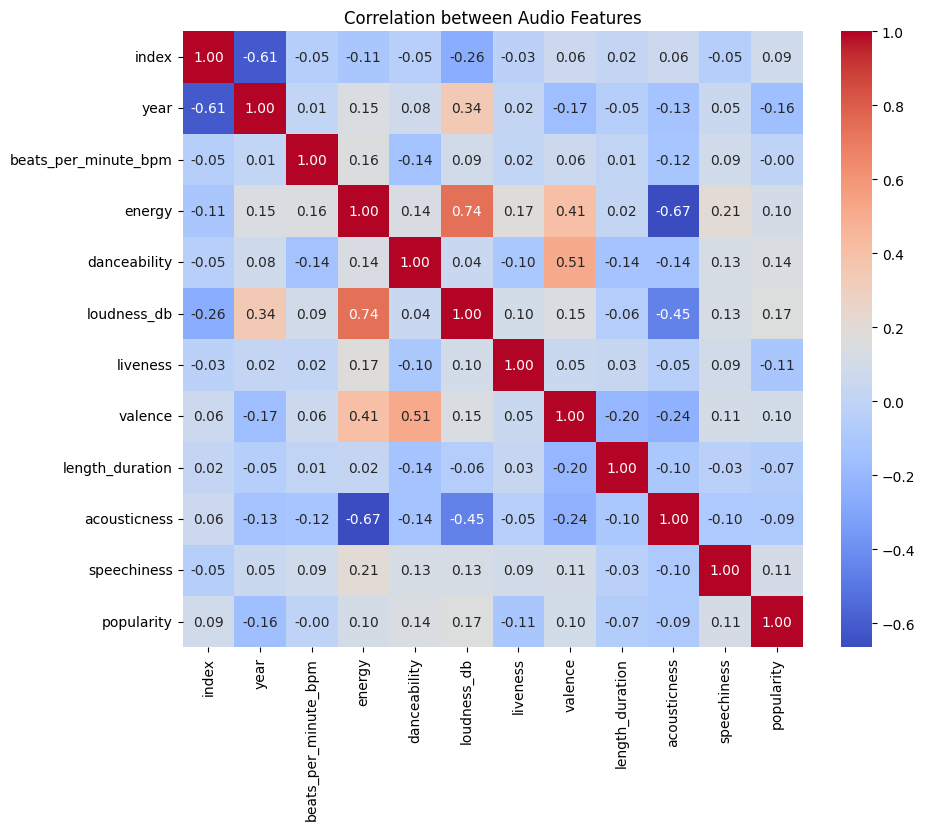

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Audio Features')
plt.show()

While some features cluster together (like Energy, Loudness, and Danceability), popularity seems to be influenced by more than just audio characteristics — possibly including external factors like marketing, artist recognition, or playlist placement.

#### Pair Plots

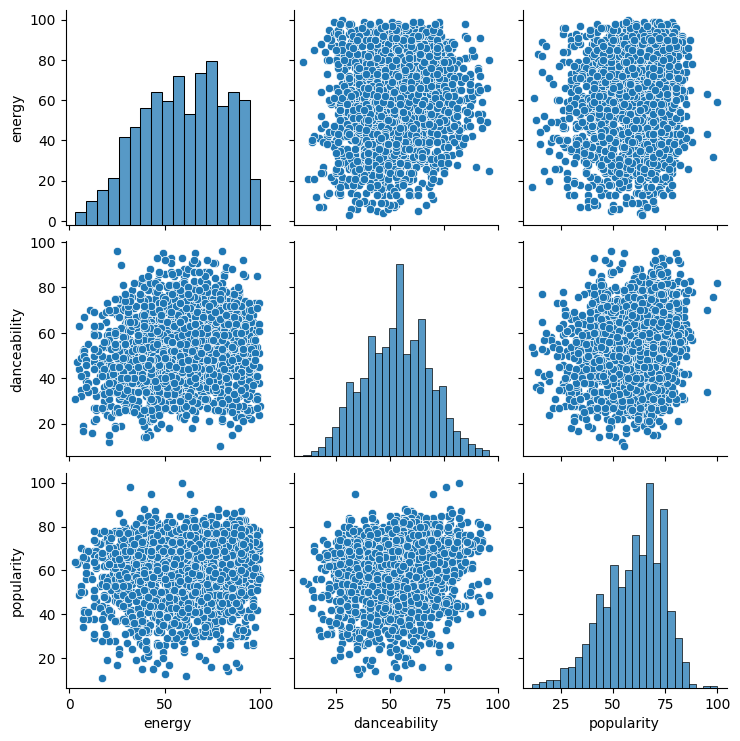

In [83]:
sns.pairplot(data[['energy', 'danceability', 'popularity']])

This supports the earlier conclusion from the correlation matrix: popularity is not tightly linked to any single audio feature like energy or danceability. Other non-audio factors likely drive a song’s popularity.

#### Popularity by Genre

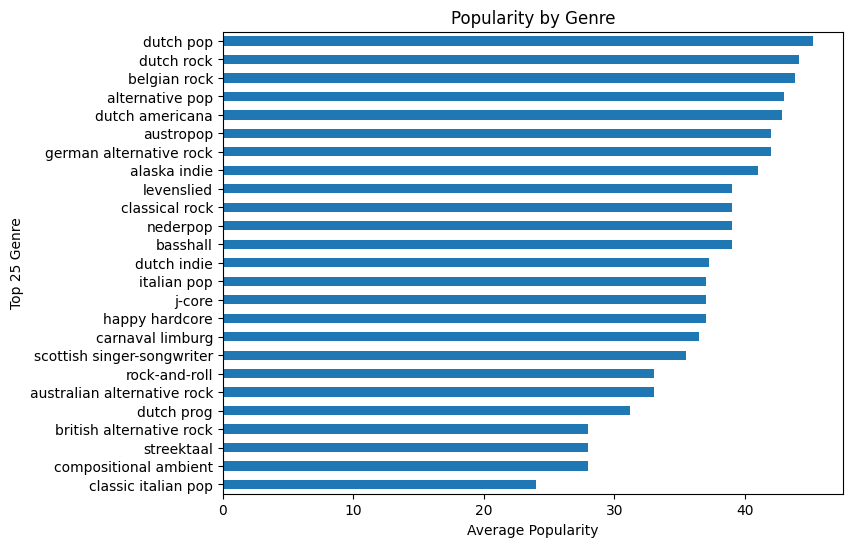

In [84]:
pop_genre = data.groupby('top_genre')['popularity'].mean().sort_values(ascending=True).head(25)

plt.figure(figsize=(8,6))
pop_genre.plot(kind='barh' )
plt.title('Popularity by Genre')
plt.xlabel('Average Popularity') 
plt.ylabel('Top 25 Genre')
plt.show()

These insights suggest that popularity is heavily influenced by regional appeal and audience size, rather than audio features alone. Niche genres tend to have devoted but smaller fanbases.

### Trends Over Time

#### Number of Songs Over Years

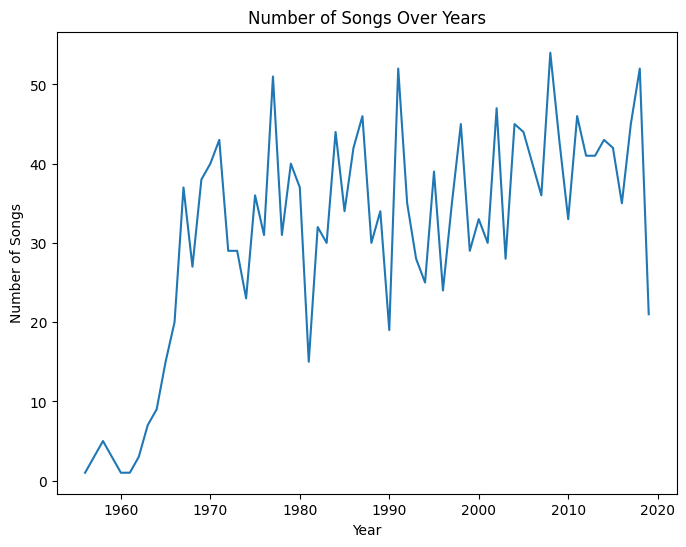

In [85]:

plt.figure(figsize=(8, 6))
data['year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Songs Over Years')
plt.xlabel('Year') 
plt.ylabel('Number of Songs')
plt.show()


This visualization highlights the dataset’s historical depth and suggests that most available songs are concentrated from 1970 to 2018, which may influence trend analyses.

#### Popularity vs Year


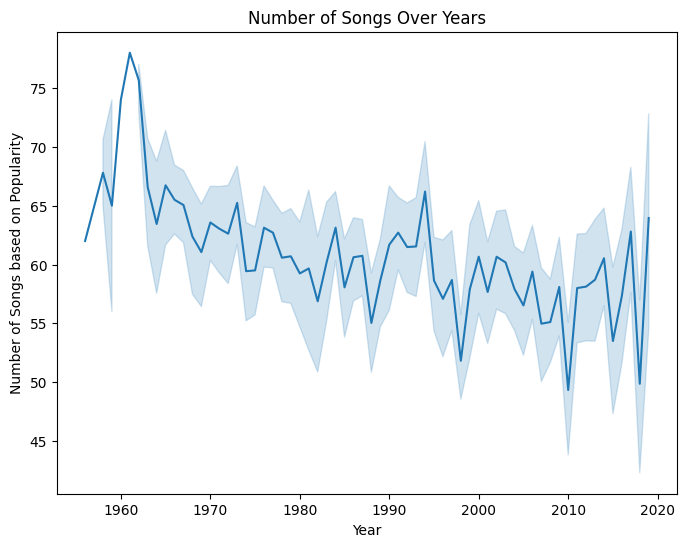

In [86]:

plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='year', y='popularity')
plt.title('Number of Songs Over Years')
plt.xlabel('Year') 
plt.ylabel('Number of Songs based on Popularity')
plt.show()


In short, popularity does not show a clear linear increase or decline over time, which may reflect Spotify’s algorithmic curation or the diverse nature of its catalog.

### How do audio features vary by genre? / Do features like energy, danceability, loudness differ across top genres?


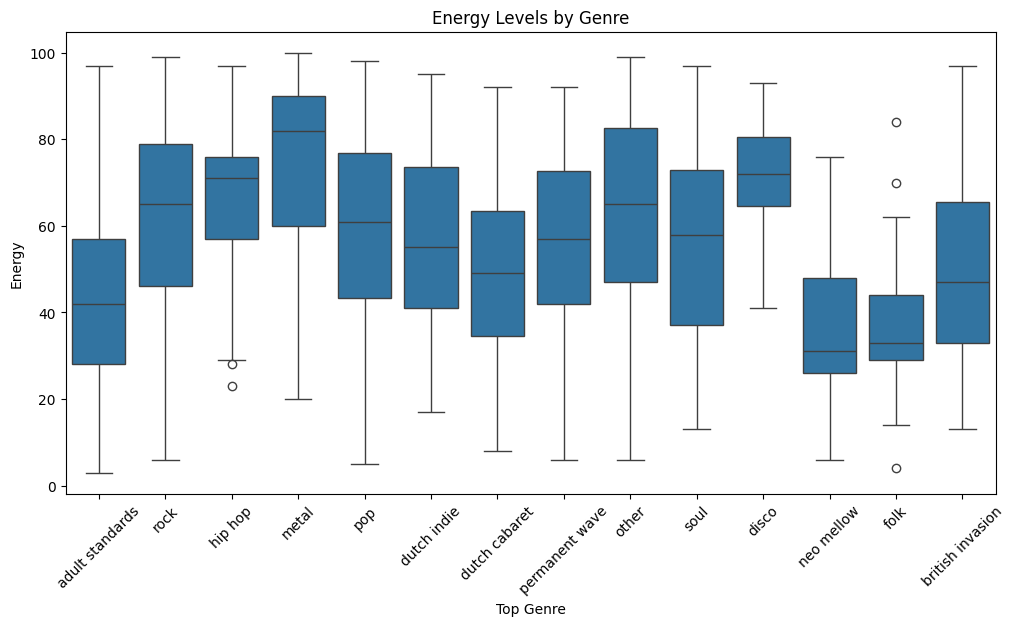

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre_group', y='energy')
plt.xticks(rotation=45)
plt.title('Energy Levels by Genre')
plt.xlabel('Top Genre')
plt.ylabel('Energy')
plt.show()

Genre is a strong indicator of energy, but there is still significant variety within most categories — especially in mainstream genres like pop and rock.

### How does popularity vary with danceability, considering genre and year?

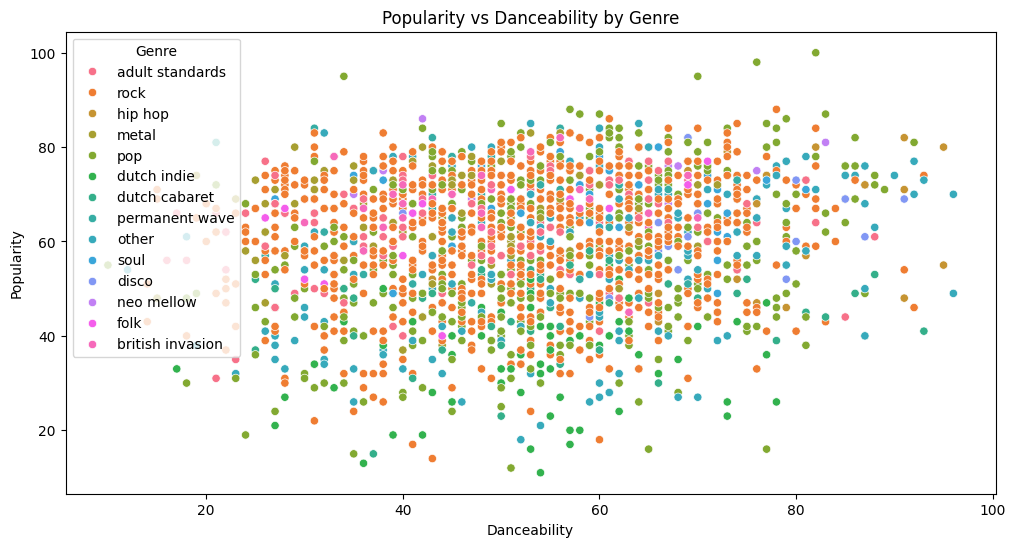

In [88]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='danceability', y='popularity', hue='genre_group')
plt.title('Popularity vs Danceability by Genre')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend(title='Genre')
plt.show()


While danceability may contribute to a track’s success, it is clearly not the sole driver of popularity — other features or external factors (e.g., artist fame, marketing) likely play a key role.

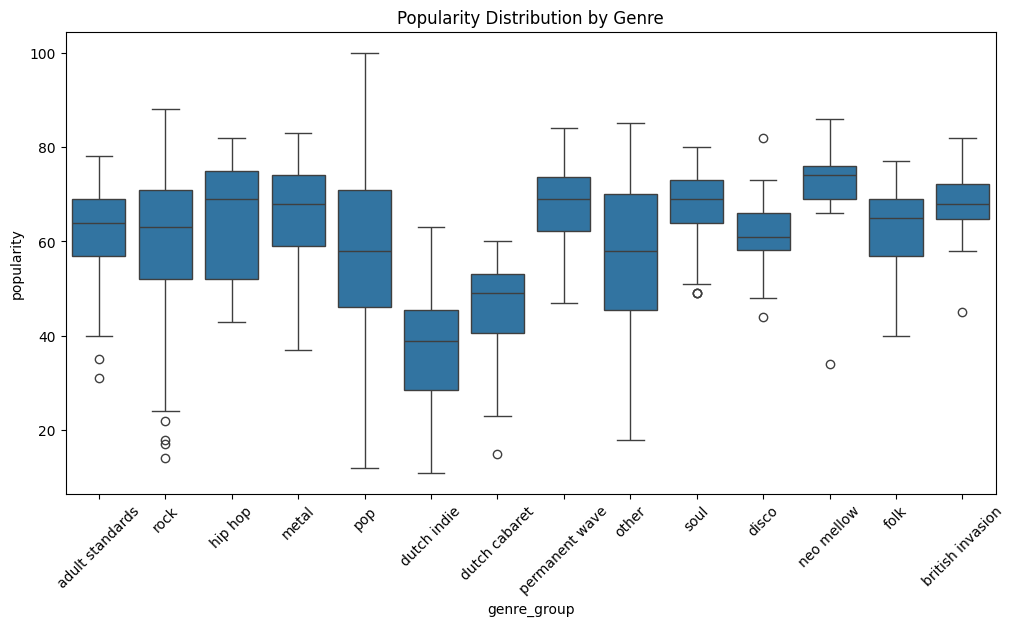

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre_group', y='popularity')
plt.title('Popularity Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

Genre appears to have a notable impact on popularity, but within each genre, there’s still substantial variation, highlighting the role of other factors like artist recognition, production quality, or promotional reach.